In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,male,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


## Dataset Description

age: age of primary beneficiary

Male: insurance contractor gender,1 for male and 0 for female

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance  or number of dependents

smoker: Smoke or not, 1 for smoker and 0 for non-smoker

charges: Individual medical costs billed by health insurance

In [4]:
from sklearn.linear_model import LinearRegression

## Simple Linear Regression

In [7]:
df.shape

(1338, 6)

Using the info, we can see whether there are any null values in the data. If yes, then we have to do some data manipulation.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   male      1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [9]:
df.describe()

,age,male,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\hlee0\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


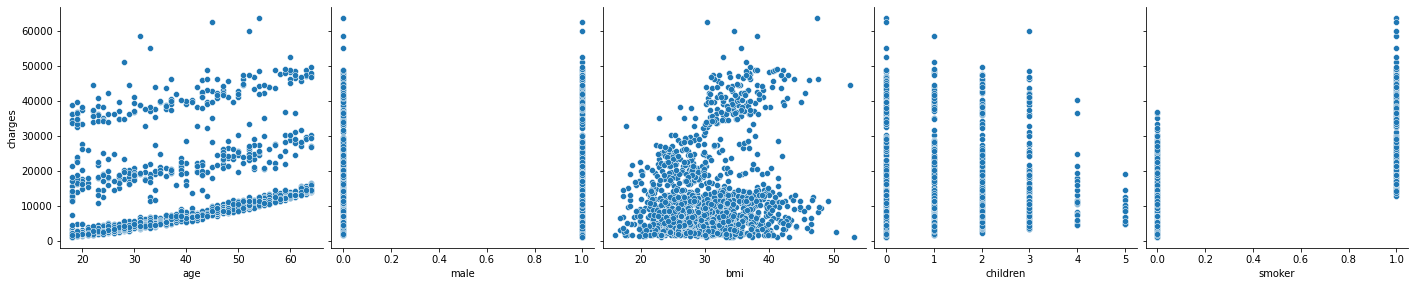

In [15]:
sns.pairplot(df, x_vars=['age', 'male','bmi','children','smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

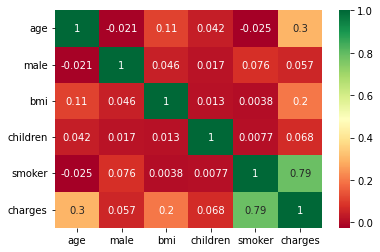

In [16]:
sns.heatmap(df.corr(), cmap="RdYlGn", annot = True)
plt.show()

### Smoker Column most corelate to the charges

## Create X and y

In [17]:
X = df['smoker']
y = df['charges']

## Create Train and Test sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)